<a href="https://colab.research.google.com/github/n23950629/My-python-work/blob/master/%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

In [0]:
%tensorflow_version
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt



Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


### 讀入標準套件

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(x_train , y_train),(x_test, y_test)=fashion_mnist.load_data()

### 看數據內容

In [0]:
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'] 

In [0]:
n=9487

In [0]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,  79, 116,  76,
         28,  61, 116, 123,  52,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 174, 166, 178,
        107, 150, 150, 167, 157,  20,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  88, 130, 148, 151,
         84, 131, 159, 134, 123,  21,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  97, 120, 111, 139,
        163, 155, 111, 110, 139,  28,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  99, 126, 112,  99,
         97, 103, 108, 107, 139,  32,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 106, 119, 104, 102,
        111, 110, 103,  96, 136,  36,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [0]:
y_train[n]

0

這是 T-shirt


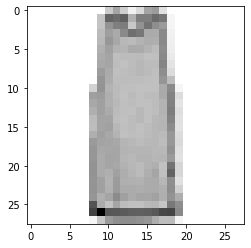

In [0]:
plt.imshow(x_train[n], cmap='Greys')
print('這是', class_names[y_train[n]])

### 資料準備

In [0]:
x_train = x_train.reshape(60000,784)/255
x_test = x_test.reshape(10000,784)/255

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train = to_categorical(y_train,10)

In [0]:
y_test = to_categorical(y_test,10)

In [0]:
y_train[9487
        ]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### 打造神經網路

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [0]:
model = Sequential()

In [0]:
model.add(Dense(200, input_dim=784, activation="relu"))

In [0]:
model.add(Dense(200, activation="relu"))

In [0]:
model.add(Dense(100, activation="relu"))

In [0]:
model.add(Dense(10, activation='softmax'))

### 4.組裝我們的神經網路

In [0]:
model.compile(loss="mse",optimizer=SGD(lr=0.087),metrics=["accuracy"])

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_20 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_21 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1010      
Total params: 218,310
Trainable params: 218,310
Non-trainable params: 0
_________________________________________________________________


### 5.訓練

In [0]:
model.fit(x_train, y_train, batch_size=25, epochs=40)

Train on 60000 samples
Epoch 1/40
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0458 - accuracy: 0.6777
Epoch 2/40
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0269 - accuracy: 0.8196
Epoch 3/40
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0239 - accuracy: 0.8380
Epoch 4/40
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0222 - accuracy: 0.8494
Epoch 5/40
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0212 - accuracy: 0.8560
Epoch 6/40
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0203 - accuracy: 0.8619
Epoch 7/40
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0197 - accuracy: 0.8662
Epoch 8/40
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0191 - accuracy: 0.8709
Epoch 9/40
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0185 - accuracy: 0.8741
Epoch

### 6.訓練成果

In [0]:
result = model.predict_classes(x_test)

神經網路預測是: Trouser


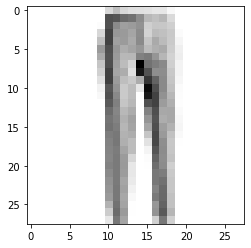

In [0]:
n=487

print('神經網路預測是:', class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')